# Lecture 39: Assignment 5 Discussion

---

1. **Toll-Revenue Optimisation**

    Consider a highway management firm that operates and maintains the expressway connecting Chennai with Bangalore. The highway management firm wants to set toll price $p_1$ for private vehicles and $p_2$ for commercial vehicles, to collect toll revenue on this highway. However, the National Highways Authority of India (NHAI) wants to facilitate sufficient flow between Chennai and Bangalore, ensuring that at least 1000 private and 1500 commercial vehicles each use the expressway during the peak hour. Given that the peak hour expressway traffic for private and commercial vehicles is subject to respective toll prices, and is given by $Q_1(p_1) = 5000 - 20p_1$ and $Q_2(p_2) = 6000 - 0.05p_2^2$, respectively, address the questions below. (Note: assume toll prices to take fractional values)

    a. Formulate an optimisation model for this problem. (2) 

    Objective:

    $$
    \max_{p_1, p_2} \ Z = p_1 (5000 - 20p_1) + p_2 (6000 - 0.05p_2^2)
    $$

    Subject to:

    $$
    \begin{aligned}
      & 5000 - 20p_1 \geq 1000 \\
      & 6000 - 0.05p_2^2 \geq 1500 \\
      & p_1, p_2 \in \mathbb{R}_+
    \end{aligned}
    $$

    b. Formulate Lagrange optimisation model for this problem. (2)

    $$
    \min_{p_1, p_2, \gamma_1, \gamma_2} \ L = p_1 (20p_1 - 5000) + p_2 (0.05p_2^2 - 6000) + \gamma_1 (4000 - 20p_1) + \gamma_2 (4500 - 0.05p_2^2) 
    $$

    c. Develop the Karush-Kuhn-Tucker (KKT) conditions for this problem. (2)

    $$
    \begin{aligned}
        40p_1 - 5000 - 20 \gamma_1 & = 0 \\
        0.15p_2^2 - 6000 - 0.1 \gamma_2 p_2 & = 0 \\
        \gamma_1 (4000 - 20p_1) & = 0 \\
        \gamma_2 (4500 - 0.05p_2^2) = 0
    \end{aligned}
    $$

    d. Fomrulate the Hessian matrix. (2)

    $$
    \begin{aligned}
    H = 
      \begin{bmatrix}
        40 & 0 & -20 & 0 \\
        0 & 0.3p_2 - 0.1\gamma_2 & 0 & -0.1p_2 \\
        -20 & 0 & 0 & 0 \\
        0 & -0.1p_2 & 0 & 0
      \end{bmatrix}
    \end{aligned}
    $$

    e. Solve the above-developed KKT conditions. (2)

    | SNo. | $\gamma_1$ | $\gamma_2$ | $p_1$ | $p_2$ |
    |------|------------|------------|-------|-------|
    | 1    | 0          | 0          | 125   | 200   |
    | 2    | 150        | 250        | 200   | 300   |
    | 3    | 0          | 250        | 125   | 300   |
    | 4    | 150        | 0          | 200   | 200   |

    f. Calculate total toll-revenue for each solution and report the optimal. (1)

    | SNo. | Z         |
    |------|-----------|
    | 1    | 1,112,500 |
    | 2    |   650,000 |
    | 3    |   762,500 |
    | 4    | 1,000,000 |

    Optimal solution: $p_1 = 125, p_2 = 200$

2. **Variable Neighbourhood Search - Simulated Annealing - Algorithm**

Consider the Variable Neighbourhood Search (VNS) algorithm with Simulated Annealing procedure embeded within it

In [69]:
import copy
import random
import numpy as np
import matplotlib.cm as cm
import matplotlib.pyplot as plt

def vns_sa(s_o, ls, N, X, T_o, r, n=100, t=1e-5):
    """
    Variable Neighbourhood Search (VNS) Algorithm with Simulated Annealing procedure

    Parameters:
    - s_o: Initial solution
    - ls: Local search function
    - N: List of neighborhood functions
    - X: Parameters for local search
    - T_o: Initial tempertature
    - r: Cooling rate
    - n: Maximum number of iterations
    - t: Convergence threshold

    Returns:
    - Current and Best solution found in each iteration
    """
    s = s_o
    s_b = s        # Best solution found
    S_c = [s_b]    # Track current solutions over iterations
    S_b = [s_b]    # Track best solutions over iterations

    T = T_o        # Initial temperature
    
    i = 1
    k = len(N)
    e = float('inf')
    converged = False
    while not converged:
        j = 0                                           # Neighbourhood index (0-based for Python)
        while j < k:
            N_j = N[j]
            s_n = N_j(s)                                # Generate neighbor from N_j
            s_n = ls(s_n, N_j, X)                       # Apply local search on neighbor
            
            if f(s_n) < f(s):                           # If improvement, accept and reset j
                s = s_n
                j = 0
            else:
                l = random.uniform(0, 1)                # Generate random value
                if l < np.exp(-(f(s_n) - f(s)) / T):    # Accept with probability based on temperature
                    s = s_n
                j += 1                              # Else, move to next neighborhood

            if f(s) < f(s_b):                           # Update best solution if improved
                e   = f(s_b) - f(s)
                s_b = s

        S_c.append(s)                                   # Store best solution at each iteration
        S_b.append(s_b)                                 # Store best solution at each iteration

        T *= r                                          # Update temperature using cooling schedule
        
        i += 1
        if i >= n or e <= t:                            # Convergence condition
          converged = True

    return S_c, S_b

a.Write down pseudo code for the VNS-SA algorithm, clearly explaining each step. (5)

Consider the benchmarked Vehicle Routing Problem instance (E-n51-k5) defined on a directed graph $G=(d,C)$, where $d$ represents depot node, and node set $C$ represents customer nodes. Here, each customer node $c \in C$ has a demand $q_c$ that must be fulfilled from the depot via delivery fleet $V$, wherein each vehicle $v$ has a capacity $q_v$. Given traversal length $d_{ij}$ for arc $(i,j) \in A$:

In [70]:
D = [(0, 30, 40, 0)]
C = [
      (1, 37, 52, 7), 
      (2, 49, 49, 30), 
      (3, 52, 64, 16), 
      (4, 20, 26, 9), 
      (5, 40, 30, 21), 
      (6, 21, 47, 15), 
      (7, 17, 63, 19), 
      (8, 31, 62, 23), 
      (9, 52, 33, 11), 
      (10, 51, 21, 5), 
      (11, 42, 41, 19), 
      (12, 31, 32, 29), 
      (13, 5, 25, 23), 
      (14, 12, 42, 21), 
      (15, 36, 16, 10), 
      (16, 52, 41, 15), 
      (17, 27, 23, 3), 
      (18, 17, 33, 41), 
      (19, 13, 13, 9), 
      (20, 57, 58, 28), 
      (21, 62, 42, 8), 
      (22, 42, 57, 8), 
      (23, 16, 57, 16), 
      (24, 8, 52, 10), 
      (25, 7, 38, 28), 
      (26, 27, 68, 7), 
      (27, 30, 48, 15), 
      (28, 43, 67, 14), 
      (29, 58, 48, 6), 
      (30, 58, 27, 19), 
      (31, 37, 69, 11), 
      (32, 38, 46, 12), 
      (33, 46, 10, 23), 
      (34, 61, 33, 26), 
      (35, 62, 63, 17), 
      (36, 63, 69, 6), 
      (37, 32, 22, 9), 
      (38, 45, 35, 15), 
      (39, 59, 15, 14), 
      (40, 5, 6, 7), 
      (41, 10, 17, 27), 
      (42, 21, 10, 13), 
      (43, 5, 64, 11), 
      (44, 30, 15, 16), 
      (45, 39, 10, 10), 
      (46, 32, 39, 5), 
      (47, 25, 32, 25), 
      (48, 25, 55, 17), 
      (49, 48, 28, 18), 
      (50, 56, 37, 10)
]
V = [
      (1, 160),
      (2, 160),
      (3, 160),
      (4, 160),
      (5, 160)
]

Consider the objective function evaluation definition $f$ for the VRP:

In [71]:
# Compute total cost
def f(s):
    z = 0
    d = D[0]

    for k, R in enumerate(s):
        if not R:
            continue
        
        # Distance
        n  = C[R[0]]
        z += np.sqrt((d[1] - n[1])**2 + (d[2] - n[2])**2)
        for i in range(len(R)-1):
            m  = C[R[i+1]]
            z += np.sqrt((n[1] - m[1])**2 + (n[2] - m[2])**2)
            n  = m
        z += np.sqrt((n[1] - d[1])**2 + (n[2] - d[2])**2)

        # Penalty
        v   = V[k]
        q_v = v[1]
        w   = sum(C[i][3] for i in s[k])
        p   = max(0, w-q_v)
        z  +=  100 * p

    return z

Consider the different neighbourhood defintions $N$ for the VRP:

In [72]:
# Move  
def N1(s):
    s_n = copy.deepcopy(s)

    i, j = random.sample(range(len(V)), 2)
    k = random.randint(0, len(s_n[i])-1)
    
    c = s_n[i][k]
    del s_n[i][k]

    k = random.randint(0, len(s_n[j]))
    s_n[j].insert(k, c)

    return s_n

# Swap
def N2(s):
    s_n = copy.deepcopy(s)

    i, j = random.sample(range(len(V)), 2)
    
    if not s_n[i]:
        return s_n
    if not s_n[j]:
        return s_n
    
    a = random.randint(0, len(s_n[i])-1)
    b = random.randint(0, len(s_n[j])-1)

    s_n[i][a], s_n[j][b] = s_n[j][b], s_n[i][a]

    return s_n

# 2-opt
def N3(s):
    s_n = copy.deepcopy(s)
    
    i = random.choice([k for k, R in enumerate(s_n) if len(R) >= 4])
    
    R = s_n[i]
    a, b = sorted(random.sample(range(len(R)), 2))
    R[a:b+1] = reversed(R[a:b+1])
    s_n[i] = R
    
    return s_n

Consider the local search definition $ls$:

In [73]:
# Local Search
def ls(s, N, X):
    for _ in range(X.get("n", 50)):
        s_n = N(s)
        if f(s_n) < f(s):
            s = s_n
    return s

Consider the given initial solution $s_o$ for the VRP:

In [74]:
# Initial solution
d   = D[0]
s_o = [[] for v in V]
for i, c in enumerate(C):
    q_c = c[3]
    for j, v in enumerate(V):
        q_v = v[1]
        w   = sum(C[k][3] for k in s_o[j])
        if w + q_c <= q_v:
            s_o[j].append(i)
            break

print("Objective function value:", f(s_o))  

Objective function value: 1399.18067025679


b. Using the VNS-SA algorithm, solve for the VRP (5)

In [75]:
S_c, S_b = vns_sa(s_o, ls, [N1, N2, N3], {"n": 100} , 100, 0.9977, 1000, 1e-15)
s_o, s_b = S_b[0], S_b[-1]

c. Report the outcome: (2)
- Establish the total cost for the intial and the final (best) solution (Hint: use the objective function defintion $f$)
- Visualise the intiial and the final solution (Hint: use the visualiser function $viz$)

Objective function value: Initial 1399.18067025679
Objective function value: Best 633.719450038962


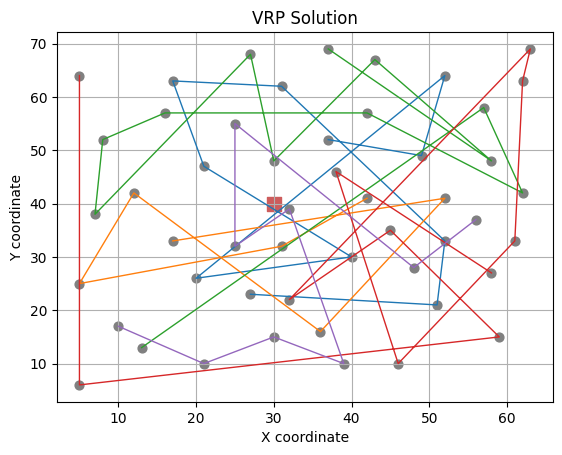

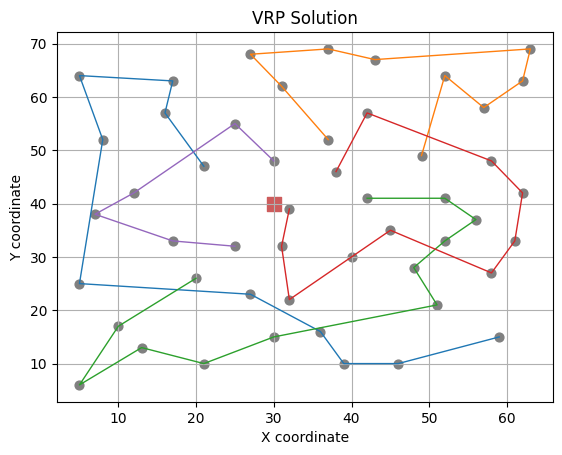

In [78]:
# Visualise
def viz(s):
    d = D[0]

    plt.scatter(d[1], d[2], c='indianred', marker='s', s=100, label='Depot')

    for i, R in enumerate(s):
        if R:
            x = [C[j][1] for j in R]
            y = [C[j][2] for j in R]
            plt.plot(x, y, label=f'Vehicle {i+1}', linewidth=1)
            plt.scatter([C[k][1] for k in R], [C[k][2] for k in R], s=40, color='grey')

    plt.title("VRP Solution")
    plt.xlabel("X coordinate")
    plt.ylabel("Y coordinate")
    plt.grid(True)
    plt.show()

# Report outcome
print("Objective function value: Initial", f(s_o))
print("Objective function value: Best", f(s_b))
viz(s_o)
viz(s_b)

d. Plot convergence (2)

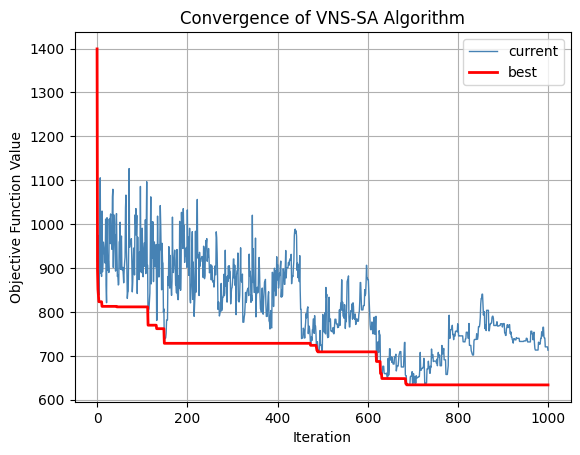

In [77]:
# Convergence plot
F_c = [f(s) for s in S_c]
F_b = [f(s) for s in S_b]
fig = plt.figure()
plt.plot(F_c, label='current', color='steelblue', linewidth=1)
plt.plot(F_b, label='best', color='red', linewidth=2)
plt.legend()
plt.xlabel("Iteration")
plt.ylabel("Objective Function Value")
plt.title("Convergence of VNS-SA Algorithm")
plt.grid()
plt.show()